# Fourier transformation 

This notebook replicates the [Fourier video from 3Blue1Brown](https://www.youtube.com/watch?v=spUNpyF58BY).

We transform a composition of two sine functions to a frequency plot.

![transformation](transformation.png)

# The project directory
To replicate this notebook you need:

- Python (3.8+) on your system
- Start with an empty project directory;
  then copy `requirements.txt`, `setup.bat`, `run.bat`, and `Fourier.ipynb` into it.
- Run `setup.bat` to create a virtual Python environment (in subdirectory `env` in the project directory).
  Note that several packages will be installed in the virtual environment (including Jupyter), as listed in `requirements.txt`.
- Run `run.bat` to run the Jupyter server and client (web page in you browser).
- Open this file (NewtonsFractal.ipynb).

## Input

We need some math functions, and even some constants.

In [1]:
from math import sin, cos, pi, e

Fourier transformation "extracts" the individual frequencies from a combined signal.
We start by defining two known signals.

The first has a frequency of 2Hz (a period of ½), the second of 3Hz (a period of ⅓).

In [2]:
def g2(t) : return cos(2*pi*2*t)
def g3(t) : return cos(2*pi*3*t)

We use matplotlib to plot them over a time of 1 (second), in 100 steps.

In [3]:
import matplotlib.pyplot as plt
t1s = [ t/100 for t in range(100+1) ]

Here are the graphs for `g2` (blue) and `g3` (green).

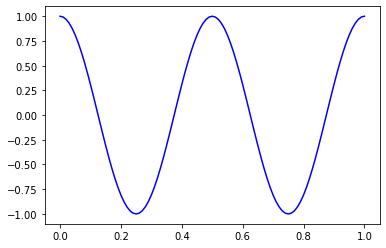

In [4]:
g2s = [ g2(t) for t in t1s ]
plt.plot( t1s, g2s, 'b-');

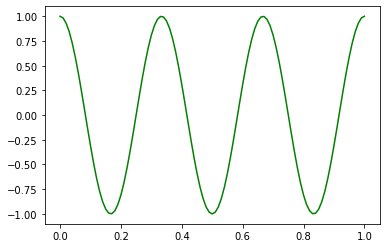

In [5]:
g3s = [ g3(t) for t in t1s ]
plt.plot( t1s, g3s, 'g-');

We combine these two signals into one, and we will try to disentangle them with a Fourier transformation.

In [6]:
def g(t) : return g2(t)+g3(t)

The combined signal (red) has the following graph (showing 3 seconds).

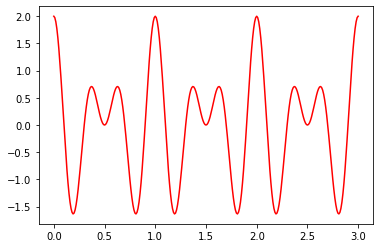

In [7]:
t3s = [ t/100 for t in range(3*100+1) ]
gs = [ g(t) for t in t3s ]
plt.plot( t3s, gs, 'r-');

Note that at e.g. t=1.0, the amplitude doubles, and at t=1.5 the amplitudes of the components cancel each other out.

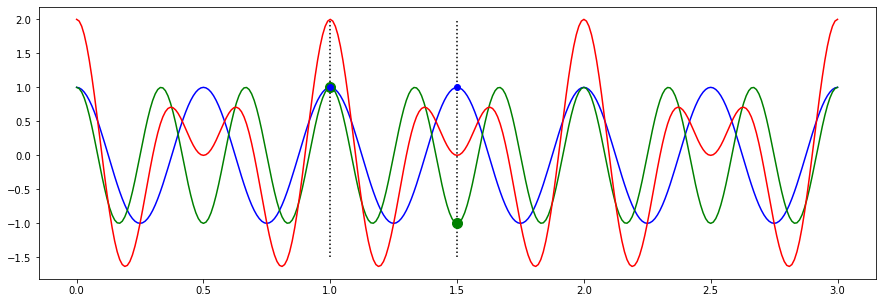

In [8]:
# new series for g2 and g3 stretching to 3 seconds
g2s = [ g2(t) for t in t3s ]
g3s = [ g3(t) for t in t3s ]

# make figure wide
fig = plt.figure(figsize=(15,5))

# draw the three graphs
plt.plot( t3s, g2s, 'b-')
plt.plot( t3s, g3s, 'g-')
plt.plot( t3s, gs, 'r-')

# draw dashed lines at t=1.0 and t=1.5
plt.plot( [1.0,1.0], [-1.5,+2.0], 'k:') 
plt.plot( [1.5,1.5], [-1.5,+2.0], 'k:')

# draw markers for g2 and g3
plt.plot( [1.0,1.5], [g3(1.0),g3(1.5)], 'go', markersize=10)
plt.plot( [1.0,1.5], [g2(1.0),g2(1.5)], 'bo');

## Intermezzo

In the [video](https://www.youtube.com/watch?v=spUNpyF58BY) 3Blue1Brown wraps the input curve in a circle around the origin. That works well with complex numbers. Recall that
$$ d e^{j\alpha} $$
is a point at distance $d$ from the origin, at a (counterclockwise) angle of $\alpha$ with the x-axis, $e$ is the mathematical constant 2.7818... and $j$ is the imaginary unit (often spelled as $i$, but python uses $j$ so I use that too in this notebook).

Let's try to visualize that, by plotting a series of point, with increasing alpha and increasing distance.

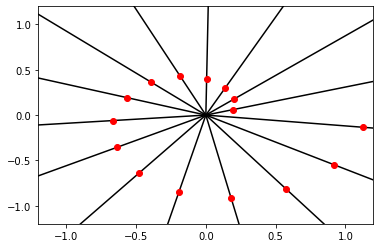

In [9]:
n = 15
alphas = [ 0.3+2*pi*i/n for i in range(n) ]
ds = [ 0.2+i/n for i in range(n) ]
points = [ d*e**(1j*alpha) for (alpha,d) in zip(alphas,ds) ]

plt.xlim( -1.2, +1.2 )
plt.ylim( -1.2, +1.2 )

xs = [ z.real for z in points ]
ys = [ z.imag for z in points ]
for alpha in alphas : plt.plot( [0,2*cos(alpha)], [0,2*sin(alpha)], 'k-') # draw radii 
plt.plot( xs, ys, 'ro');

## Winding
We will now wind `g()` around the origin.

There are a couple of complications.

- We want to map not just one second of `g`, but multiple `seconds`.
- As 3Blue1Brown does, we will add an `offset` to the signal to ensure it stays above zero.
- To get a smooth graph, we have multiple `steps` to draw one second.
- We need to chose how fast to wind; we need to set a winding frequency `wfreq`.
- We pass the `func` that we want to wind.
- Finally, `fmt` and `lim` determine the looks of the graph.

In [10]:
def wind(func, wfreq, offset=0, seconds=4.5, steps=100, fmt='r-', lim=2.2 ) :
    times = [ n/steps for n in range(int(seconds*steps+1)) ]
    alphas = [ 2*pi*wfreq*t for t in times ]
    ds = [ offset + func(t) for t in times ]
    points = [ d*e**(1j*alpha) for (alpha,d) in zip(alphas,ds) ]

    plt.xlim( -lim, +lim )
    plt.ylim( -lim, +lim )

    xs = [ z.real for z in points ]
    ys = [ z.imag for z in points ]
    plt.plot( xs, ys, fmt )
    plt.title( f"{func.__name__}(), wfreq={wfreq:0.3f}" )

We start simple: plotting `g3`. This function is a cosine with amplitude 1 (hence an `offset` of 1.1 makes sense), and 3 periods per second. When we plot with a winding frequency of 1, we see that we indeed get three periods; three "leafs".

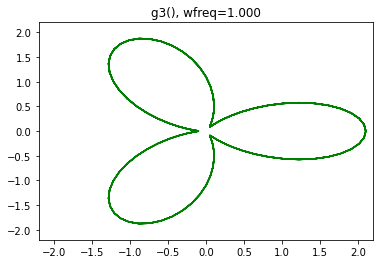

In [11]:
wind( func=g3, wfreq=1, offset=1.1, fmt='g-' )

We can also wind half as fast: a winding frequency of 0.5, we see that double amount of leafs are drawn:

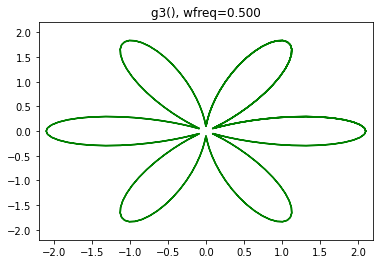

In [12]:
wind( func=g3, wfreq=0.5, offset=1.1, fmt='g-'  )

We can do the same for `g2`. Since `g2` has 2 periods per second, we get 2 and 4 leafs respectively.

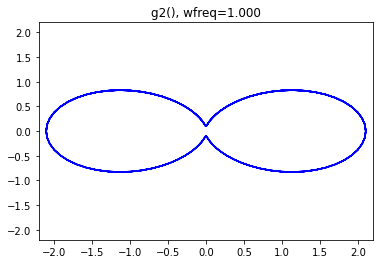

In [13]:
wind( func=g2, wfreq=1, offset=1.1, fmt='b-'  )

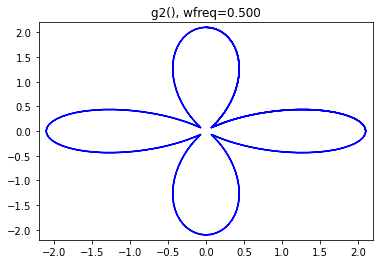

In [14]:
wind( func=g2, wfreq=0.5, offset=1.1, fmt='b-'  )

We can also sweep the winding frequency in much smaller steps (e.g. of 0.01). Note that we only draw 4.5 seconds of `g3`, otherwise all images would contain overlapping leafs filling a whole circle.

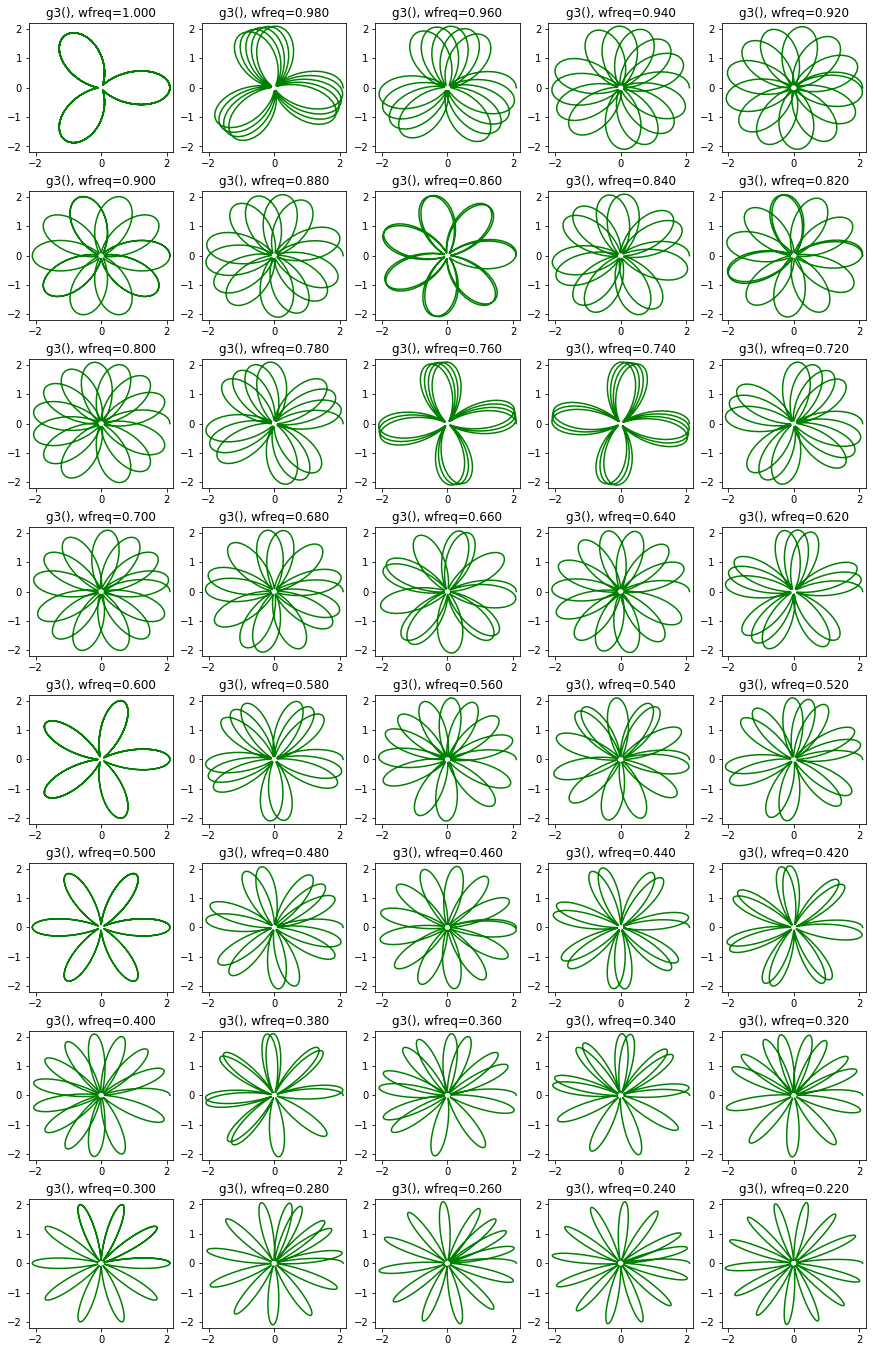

In [15]:
nx = 5
ny = 8
fig = plt.figure(nx*ny,figsize=(3*nx,3*ny))
fig.subplots_adjust(hspace=0.3)
for yy in range(ny):
    for xx in range(nx):
        ix = yy*nx+xx
        ax = fig.add_subplot(ny,nx,ix+1)
        wf = 1 - 0.02*ix
        wind( func=g3, wfreq=wf, offset=1.1 , fmt='g-' )

We can also _increase_ the winding frequency.

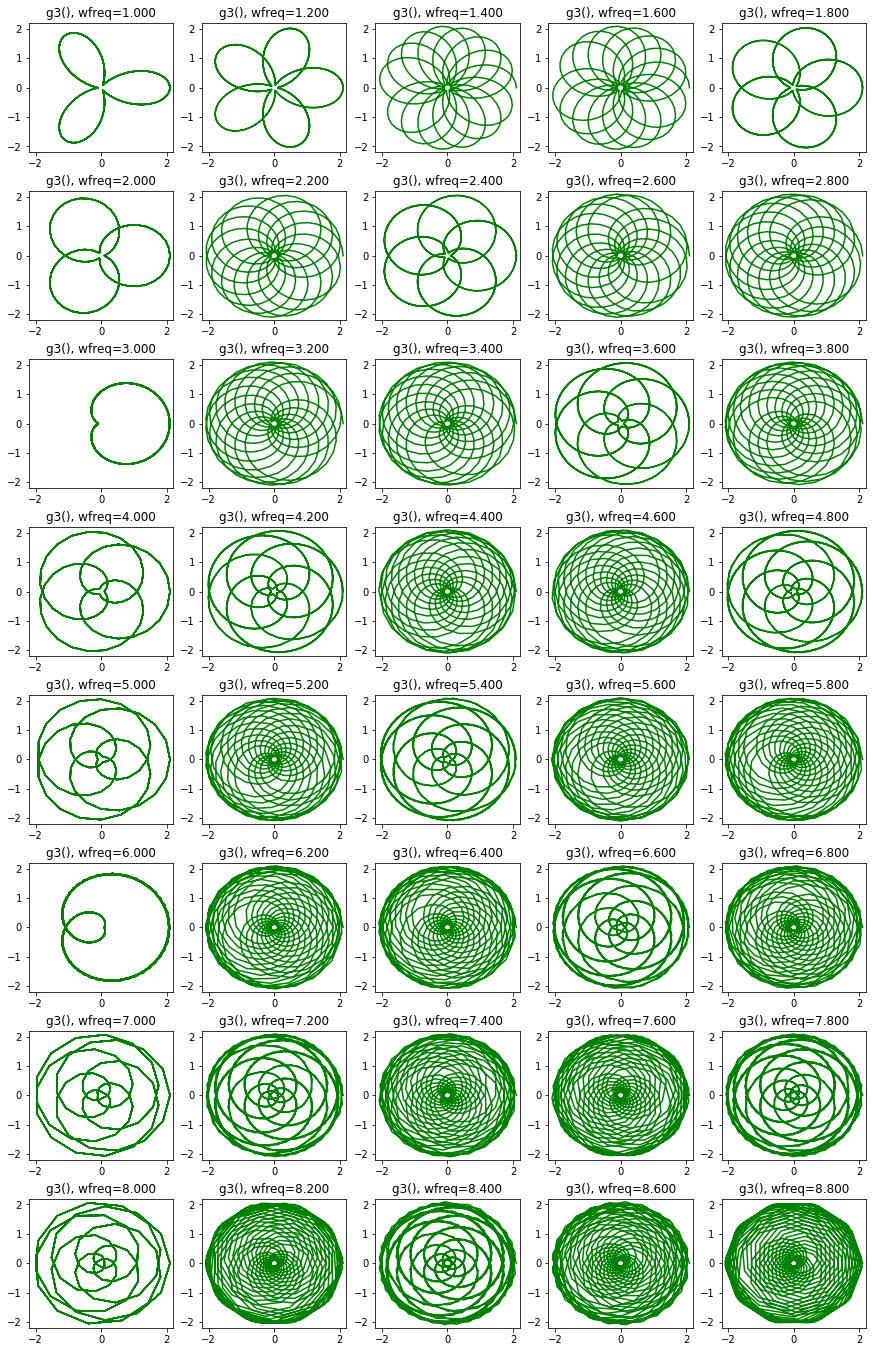

In [16]:
nx = 5
ny = 8
fig = plt.figure(nx*ny,figsize=(3*nx,3*ny))
fig.subplots_adjust(hspace=0.3)
for yy in range(ny):
    for xx in range(nx):
        ix = yy*nx+xx
        ax = fig.add_subplot(ny,nx,ix+1)
        wf = 1 + 0.2*ix
        wind( func=g3, wfreq=wf, offset=1.1 , fmt='g-' )

The crucial insight is that al graphs show a symmetrical "flower" around zero, _except_ when the _winding_ frequency is equal to the _signal_ frequency. See the graphs with `wfreq=3`.

When we plot a similar sweep for `g` (the combination of `g2` and `g3`) we see that for `wfreq=2` and `wfreq=3` the flower is not symmetrical around the origin; it will not "spin around O". 

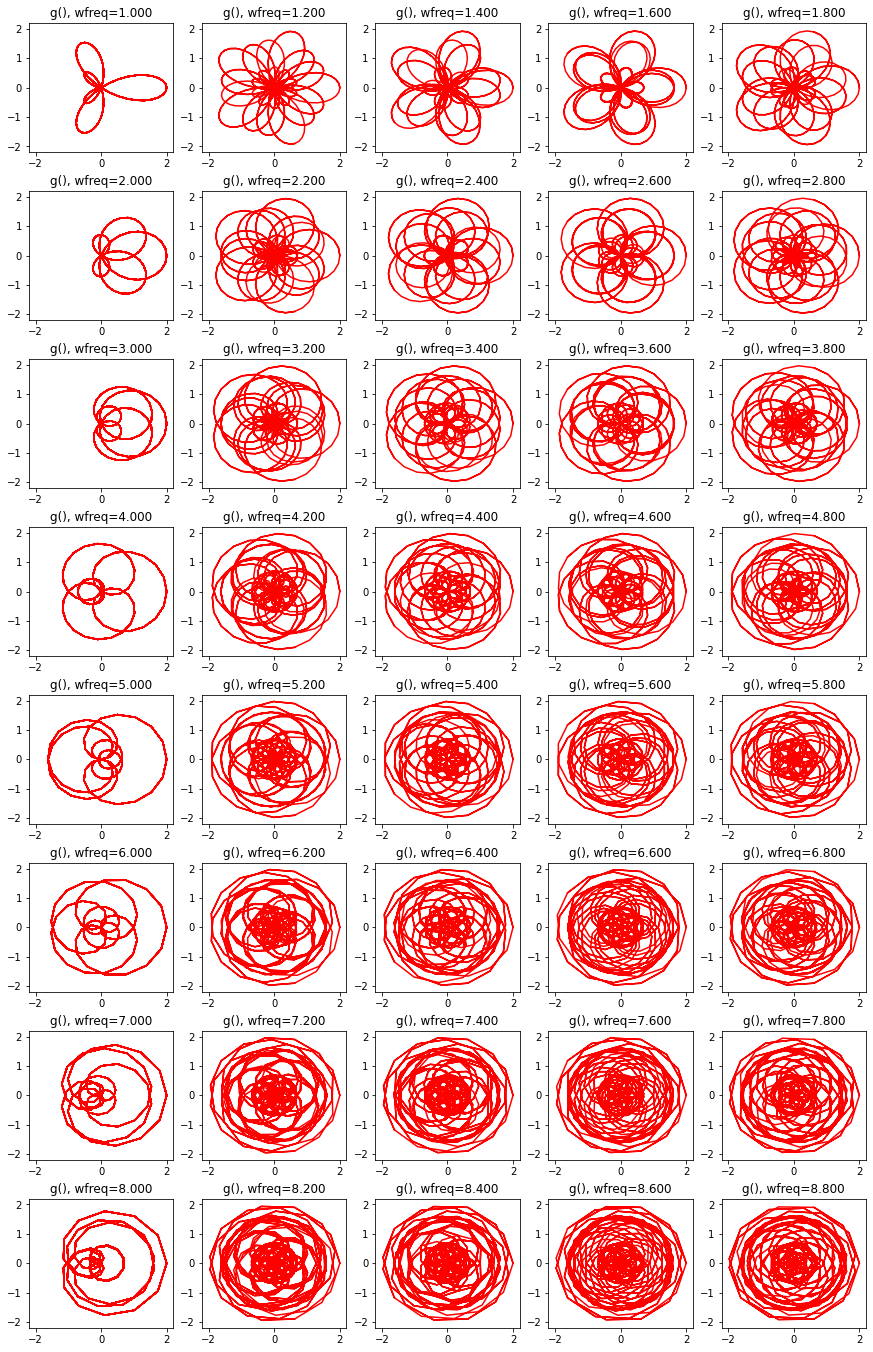

In [17]:
nx = 5
ny = 8
fig = plt.figure(nx*ny,figsize=(3*nx,3*ny))
fig.subplots_adjust(hspace=0.3)
for yy in range(ny):
    for xx in range(nx):
        ix = yy*nx+xx
        ax = fig.add_subplot(ny,nx,ix+1)
        wf = 1 + 0.2*ix
        wind( func=g, wfreq=wf, seconds=9, fmt='r-' )

So, the next step is to compute the center of gravity of the winding graph.

## Center of gravity
We compute the center of gravity with the following function.
Note that we wind clockwise this time (minus sign in exponent) as seems customary for Fourier.
Note also that we approximate the integral by summing over `steps` intervals per second.
Finallt note that we do not divide by the interval length, as seems customary for Fourier.

In [18]:
def center(func, wfreq, t0=0, t1=4.5, steps=100 ) :
    times = [ t0+t/steps for t in range(int((t1-t0)*steps)) ]
    points = [ func(t)*e**(-2*pi*1j*wfreq*t) for t in times ]
    return sum(points)/steps

We sample `g2` for some winding frequencies, looking at the real part only. Notice that the center of gravity is most off from O when the winding frequency is 2.

In [19]:
for wf in range(6) :
    print( f"{wf}: {center(g2,wf).real:0.3f}" )

0: -0.000
1: 0.010
2: 2.250
3: 0.010
4: 0.000
5: 0.010


We sample `g3`. Notice that in this case the center of gravity is most off from O when the winding frequency is 3.

In [20]:
for wf in range(6) :
    print( f"{wf}: {center(g3,wf).real:0.3f}" )

0: 0.010
1: 0.000
2: 0.010
3: 2.250
4: 0.010
5: 0.000


In [21]:
for wf in range(6) :
    print( f"{wf}: {center(g,wf).real:0.3f}" )

0: 0.010
1: 0.010
2: 2.260
3: 2.260
4: 0.010
5: 0.010


Of course, this asks for a graph. Note that instead of just looking at the real part of the center of gravity, the below function uses the _length_ (distance to O) of the complex number (function `abs`).

In [22]:
def freqs(func, f0=0, f1=6, fsteps=100, t0=0, t1=4.5, tsteps=100, fmt='r-' ) :
    fs = [ f0+f/fsteps for f in range(int((f1-f0)*fsteps+1)) ]
    cs = [ abs(center(func,f,t0,t1,tsteps)) for f in fs ]
    plt.title( f"$\widehat{{{func.__name__}}}(f)$" ) # Some laTeX magic (and braces doubled to escape f-processing)
    plt.xlabel('f (Hz)')
    plt.plot( fs, cs, fmt )

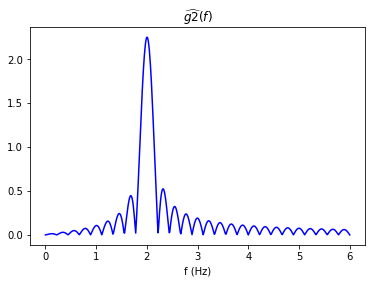

In [23]:
freqs(g2, fmt='b-')

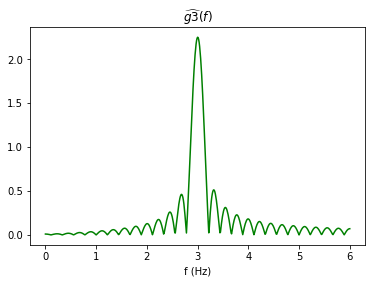

In [24]:
freqs(g3, fmt='g-')

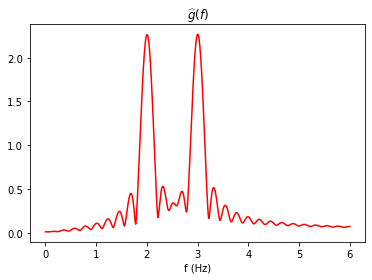

In [25]:
freqs(g)

We clearly see the frequency peak at 2 for `g2`, at 3 for `g3` and at 2 and 3 for the combined `g`.

(end)